In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('../metric_analysis/test/plain-latents8to20-valid-loss.csv')
df.sort_values(by=['valid_loss_loss'], inplace=True)

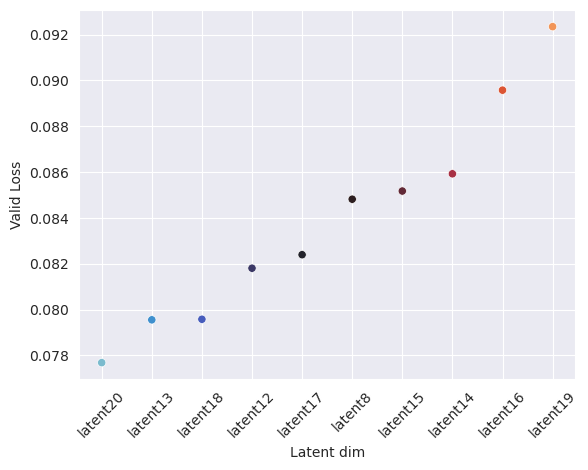

In [36]:
sns.set_style('dark')
g = sns.scatterplot(data=df, x='Run', y='valid_loss_loss', hue='Run', palette='icefire')
g.grid()
g.set_xlabel('Latent dim')
g.set_ylabel('Valid Loss')
g.tick_params(axis='x', labelrotation=45)
g.legend_.remove()

In [44]:
df

,Run,Run ID,metric,step,timestamp,value
0,latent64-valid02,c30394483b2047208720d0e2a9f8073a,train_loss,3,1734565638718,0.092256
1,latent64-valid02,c30394483b2047208720d0e2a9f8073a,train_loss,4,1734565664439,0.087289
2,latent64-valid02,c30394483b2047208720d0e2a9f8073a,train_loss,5,1734565689699,0.083494
3,latent64-valid02,c30394483b2047208720d0e2a9f8073a,train_loss,6,1734565714620,0.080261
4,latent64-valid02,c30394483b2047208720d0e2a9f8073a,train_loss,7,1734565739935,0.077836
...,...,...,...,...,...,...
875,latent12,f90a1ad2fb65421f9c31c575de0da837,valid_loss_loss,42,1734500779771,0.082930
876,latent12,f90a1ad2fb65421f9c31c575de0da837,valid_loss_loss,43,1734500806554,0.082944
877,latent12,f90a1ad2fb65421f9c31c575de0da837,valid_loss_loss,44,1734500827770,0.082211
878,latent12,f90a1ad2fb65421f9c31c575de0da837,valid_loss_loss,45,1734500853304,0.082487


In [61]:
df = pd.read_csv('../metric_analysis/test/plain-latents16to64-valid-diff.csv')
df = df[['Run', 'step', 'metric', 'value']]
# Revisar y corregir los casos donde falta la referencia "valid"
df['Run'] = df['Run'].apply(lambda x: x if '-valid' in x else f"{x}-valid01")

# Dividir el campo "Run"
df[['latent', 'valid']] = df['Run'].str.extract(r'latent(\d+)-valid(\d+)')

# Convertir las columnas a numéricas
df['latent'] = pd.to_numeric(df['latent'])
df['valid'] = pd.to_numeric(df['valid'])

In [80]:
df.step

0       3
1       4
2       5
3       6
4       7
       ..
875    42
876    43
877    44
878    45
879    47
Name: step, Length: 880, dtype: int64

In [85]:
df.query('latent == 64 and valid == 1 and step == 3')

,Run,step,metric,value,latent,valid
44,latent64-valid01,3,train_loss,0.08820,64,1
484,latent64-valid01,3,valid_loss_loss,0.08567,64,1


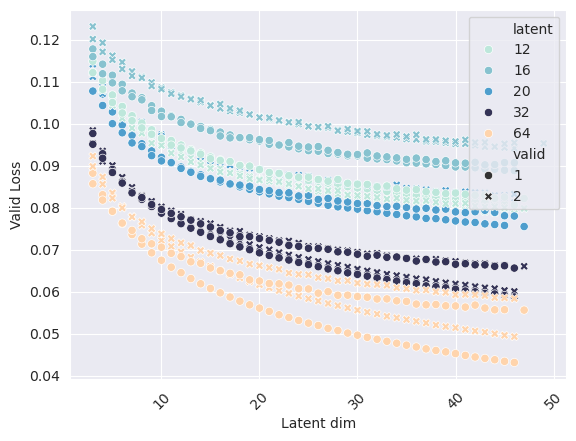

In [64]:
sns.set_style('dark')
g = sns.scatterplot(data=df, x='step', y='value', hue='latent', style='valid', palette='icefire')
g.grid()
g.set_xlabel('Latent dim')
g.set_ylabel('Valid Loss')
g.tick_params(axis='x', labelrotation=45)
# g.legend_.remove()

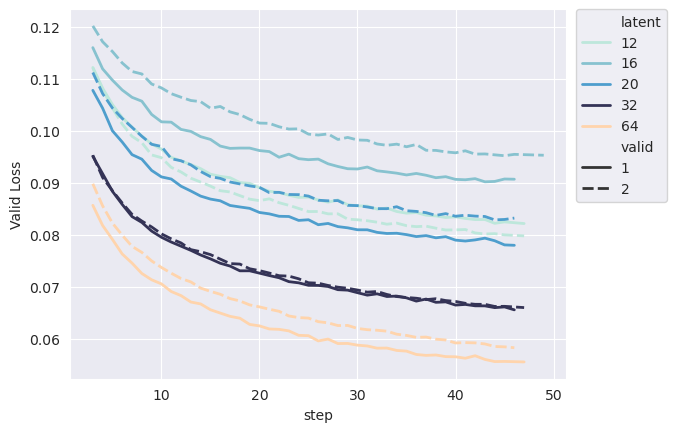

In [90]:
g = sns.lineplot(data=df.query('metric == "valid_loss_loss"'), x="step", y="value", hue="latent", style="valid", palette="icefire", linewidth=2 )
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.) 

g.set_xlabel('step')
g.set_ylabel('Valid Loss')
g.grid()

In [110]:
df2 = pd.read_csv('../metric_analysis/test/plain-latents16to64-valid-barplot.csv')

df2['Run'] = df2['Run'].apply(lambda x: x if '-valid' in x else f"{x}-valid01")

# Dividir el campo "Run"
df2[['latent', 'valid']] = df2['Run'].str.extract(r'latent(\d+)-valid(\d+)')

<Axes: xlabel='valid_loss_loss', ylabel='Run'>

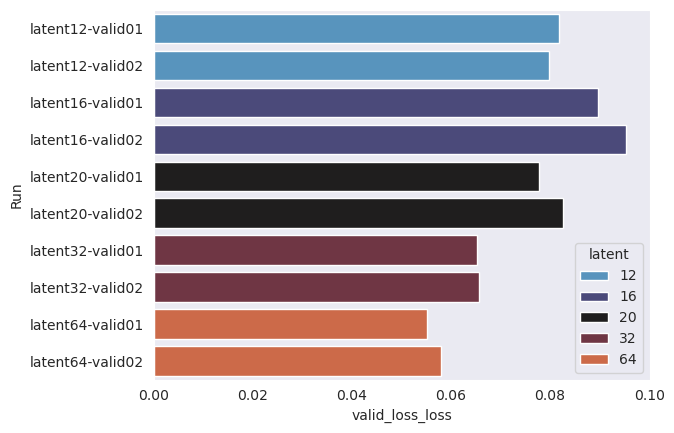

In [116]:
df2.sort_values(by=['Run'], inplace=True)
sns.barplot(data=df2, y='Run', x='valid_loss_loss', hue='latent', palette="icefire")